<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2018

<font size=1>Parte de este material es autoría del profesor Cristian Guarnizo de la Universidad Tecnológica de Pereira. A él damos créditos.</font>

En este notebook se implementan tres casos de algoritmos genéticos:
<ul>
    <li>Problema de la bolsa.</li>
    <li>Problema del viajero.</li>
    <li>Problema de minimización de una función real.</li>
</ul>

<hr>
## Módulo 2_2: Algoritmos Bioinspirados - Algoritmos genéticos
<img src="res/AG/algorithm.png" width="600px">

<hr>
# 1.Problema de la Bolsa (representación binaria)
Determinar para cada caso cuales objetos se deben llevar, maximizando la suma de los valores de los elementos sin sobrepasar la capacidad.
<img src="res/AG/bolsa.png" width=400>
En este problema se requiere maximizar el beneficio sin sobrepasar la capacidad. Se emplea el algoritmo genético con codificación binaria (genbin), debido que la codificación binaria me permite con 1 lógico incluir el elemento, y con un 0 excluirlo. Finalmente se encuentra que elementos se deben agregar de tal forma que se maximice el beneficio. 

<hr>
## 1.1. Funcion de aptitud

La función de aptitud determina el valor de calidad de un cromosoma dentro de una población. Para este caso, supongamos que la función de aptitud es la sumatoria del valor de los elementos que se llevan en la bolsa. En caso de que la suma de los pesos supere el valor máximo o capacidad máxima de la bolsa, entonces la función de aptitud es cero.

<center>

$aptitud(x)=\begin{Bmatrix}
si (\sum x_{peso} \leqslant k) \Rightarrow  \sum x_{valor}
\\ 
sino \Rightarrow  0
\end{Bmatrix} $

</center>

Donde $x$ es un cromosoma binario que representa los elementos que llevan y los que no, y $k$ es la capacidad máxima de la bolsa.

Según lo anterior, completar el siguiente código.

In [30]:
import numpy as np

def funcion_aptitud(x):
    peso = np.array([28, 11, 15, 19, 5, 3, 8]) 
    valor = np.array([40, 22, 30, 37, 8, 5, 12]) 
    
    k = 44 
    
    #utilice np.sum para calcular la sumatoria de un vector
    #COMPLETAR
    if (None):
        aptitud = None
    else:
        aptitud = None
    
    return aptitud

<hr>
## 1.2. Inicialización de parámetros del algoritmo genético

In [31]:
ni = 100 #numero de iteraciones
nc = 10 #tamaño de la poblacion
ng = 7 #numero de genes por cromosoma

pc = 0.9 #probabilidad de cruce
pm = 0.5 #probabilidad de mutacion

<hr>
## 1.3. Inicializar población (p) y calcular la aptitud (fa) de sus individuos

La población inicial es una matriz de binarios $P_{nc \times ng}$, donde $nc$ es el número de cromosomas y $ng$ es el número de genes.

Funciones de interes para la implementación:
<br><br>
<font size="3">
<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random.html">np.random.random</a>
<br>
<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.round_.html">np.round</a>
</font>

In [ ]:
seed = 2
np.random.seed(seed)

#utilice np.random.random y np.round para generar la matriz de binarios p.
#COMPLETAR
p = None

#fa es un vector que almacenará las funciones de aptitud de cada individuo de la población.
fa = np.zeros([nc], dtype=np.int)

for i in range(None):
    fa[i] = funcion_aptitud(None)

print("Poblacion inicial: ", p)
print("Aptitudes: ", fa)

**Resultado esperado**
<br>
Poblacion inicial:
<br>
[[ 0.  0.  1.  0.  0.  0.  0.]
<br>
 [ 1.  0.  0.  1.  1.  0.  1.]
 <br>
 [ 0.  1.  1.  0.  1.  0.  1.]
 <br>
 [ 0.  0.  0.  0.  1.  0.  0.]
 <br>
 [ 0.  0.  0.  0.  1.  0.  1.]
 <br>
 [ 0.  1.  1.  0.  1.  1.  1.]
 <br>
 [ 1.  0.  1.  0.  0.  1.  1.]
 <br>
 [ 1.  1.  0.  0.  1.  0.  0.]
 <br>
 [ 0.  0.  1.  1.  1.  1.  1.]
 <br>
 [ 0.  0.  1.  0.  0.  1.  0.]]
 <br>
 Aptitudes: [30,  0, 72,  8, 20, 77,  0, 70,  0, 35]

<hr>
## 1.4. Ciclo principal del algoritmo genético:
**Seleccion->Cruce->Mutación->Evaluación->Inserción**

Analizar en clase el siguiente código y:

1. Evaluar la convergencia del algoritmo.
2. Medir el impacto de los parametros iniciales en la convergencia.
3. Implementar la etapa de inserción por reemplazo de los mejores de la población.

In [20]:
for i in range(ni):
    #Seleccion - Aleatoria
    p1 = np.random.randint(nc-1)
    p2 = np.random.randint(nc-1)
    
    #Cruce a un punto
    if(np.random.rand() <= pc):
        cross_point = np.random.randint(ng)
        child1 = np.append(p[p1, 0:cross_point], p[p2, cross_point:])
        child2 = np.append(p[p2, 0:cross_point], p[p1, cross_point:])
        
    #Mutacion: se muta un bit aleatoriamente
    if(np.random.rand() <= pm):
        mut_point_c1 = np.random.randint(ng-1)
        mut_point_c2 = np.random.randint(ng-1)
        
        child1[mut_point_c1] = 1-child1[mut_point_c1]
        child2[mut_point_c2] = 1-child2[mut_point_c2]
    
    #Se evaluan los nuevos hijos
    eval_child1 = evalbin(child1)
    eval_child2 = evalbin(child2)
    
    #Insercion por reemplazo de los padres.
    if(eval_child1 > fa[p1]):
        p[p1] = child1
        fa[p1] = eval_child1
    
    if(eval_child2 > fa[p2]):
        p[p2] = child2
        fa[p2] = eval_child2

## 1.5. Mostrar mejor individuo al final de las iteraciones

In [21]:
print 'La mejor configuración para la bolsa es: ', p[np.argmax(fa)]
print 'Con una función de aptitud de: ', fa[np.argmax(fa)]

La mejor configuración para la bolsa es:  [ 0.  0.  1.  1.  1.  1.  0.]
Con una función de aptitud de:  80


<hr>
# 2. Problema del viajero (representación entera)
<img src="res/AG/tsp.png" width=600>
Determinar cual es la mejor ruta que minimice el recorrido por las ciudades ubicadas en las siguientes coordenadas: (graficar la solución del recorrido.
<img src="res/AG/cities.png" width=600>
<br>
Para resolver este problema se emplea el algoritmo genético con codificación entera en donde no se repiten los números (no se repiten ciudades). Para evaluar los cromosomas se requiere diseñar la funciona de evaluación.
<br>

En este problema cada ciudad está representada mediante una coordenada $x$ y una coordenada $y$. La representación del cromosoma para el algoritmo genético será entonces, un vector con el índice de la ciudad según su orden en los vectores $x$ y $y$.

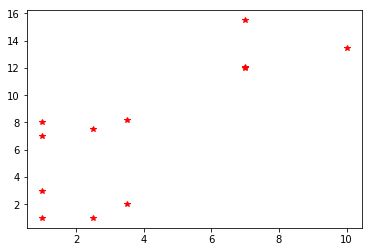

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt

x=np.array([1, 1, 1, 1, 2.5, 2.5, 3.5, 3.5, 7.0, 10.0, 7.0, 7.0]) #cities x coordinate
y=np.array([1, 3, 7, 8, 7.5, 1.0, 2.0, 8.2, 15.5, 13.5, 12.1, 12]) #cities y coordinate

plt.plot(x, y, 'r*')#cities

<hr>
## 2.1. Funcion de aptitud

Para este caso, la función de aptitud de un cromosoma $c$ se define el inverso de la sumatoria de las distancias entre ciudades consecutivas que representa. Por ejemplo, el cromosoma $c = [1, 2, 3]$  representa una ruta que recorre en orden $ciudad_1->ciudad_2->ciudad_3$.

En cuyo caso, la función de aptitud sería:

$\frac{1}{\sqrt{(ciudad_1[x]-ciudad_2[x])^2 + (ciudad_1[y]-ciudad_2[y])^2} + \sqrt{(ciudad_2[x]-ciudad_3[x])^2 + (ciudad_2[y]-ciudad_3[y])^2}}$ 

En términos generales, la función de aptitud se define como:
$aptitud(x) = \frac{1}{\sum{\sqrt{(ciudad_i[x]-ciudad_{i+1}[x])^2 + (ciudad_i[y]-ciudad_{i+1}[y])^2 }}}$

In [55]:
import numpy as np

def funcion_aptitud(c):
    x=np.array([1, 1, 1, 1, 2.5, 2.5, 3.5, 3.5, 7.0, 10.0, 7.0, 7.0]) #coordenadas x de las ciudades
    y=np.array([1, 3, 7, 8, 7.5, 1.0, 2.0, 8.2, 15.5, 13.5, 12.1, 12]) #coordenadas y de las ciudades
    
    #cerremos el ciclo entre ciudades
    c = np.append(c,c[0])
        
    #COMPLETAR: 1 linea
    dist_sum = 0 #Esta variable almacenará la sumatoria de las distancias. Inicializar.
    
    for i in range(len(x)):
        #por cada ciudad i, tomar los valores x y y de las ciudades i y la ciuad i+1
        #COMPLETAR: 4 lineas
        tx1 = None
        tx2 = None
        ty1 = None
        ty2 = None
        
        #linear distance between 2 adyacent cities
        #Utilice np.sqrt para calcular la raiz cuadrada
        dist_sum += None
    
    return 1.0/dist_sum

In [ ]:
cromosoma = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
print funcion_aptitud(cromosoma)

**Resultado esperado:** 0.0198660493146

## 2.2. Inicializar parámetros del algoritmo genético

In [60]:
ni = 1000 #numero de iteraciones
nc = 10 #numero de cromosomas
ng = 12 #numero de genes

pc = 0.9 #probabilidad de cruce
pm = 0.5 #probabilidad de mutacion

## 2.3. Inicializar población (p) y calcular la aptitud (fa) de sus individuos

En este caso, la población inicial consiste en una matriz de enteros $p_{nc \times ng}$, con la restricción de que la secuencia de ciudades no puede tener repetición de ciudades. Por ello cada cromosoma es una permutación de ciudades. Pruebe el siguiente código:

In [67]:
cromosoma = np.random.permutation(4)
print cromosoma

[1 0 2 3]


In [70]:
seed = 2
np.random.seed(seed)

fa = np.zeros([nc], dtype=np.float) #vector de aptitudes
p = np.zeros([nc, ng], dtype=np.int) #matriz de poblacion

for i in range(nc):
    #COMPLETAR: 2 lineas
    p[i, :] = None #permutacion
    fa[i] = None #funcion de aptitud

In [71]:
print p

[[ 9  5  4  7  1 10  0  3  2  6 11  8]
 [ 1  0  8  6  2  9  3  7  5 11  4 10]
 [ 6  7  2  8 11  9  4  0  5  3 10  1]
 [ 5  3  9  8 10  0  6  7  1 11  2  4]
 [ 5 11  3  4 10  2  0  6  1  7  8  9]
 [ 1  5 11  6  4  8  7  2  9  0  3 10]
 [ 8  4  1 11  0  3  7 10  5  6  9  2]
 [ 0  7 11  3  9  4  2 10  5  6  1  8]
 [ 2 10 11  1  7  6  0  9  3  8  5  4]
 [ 4 11  0  3  2  9 10  7  1  5  6  8]]


**resultado esperado: ** 
<br>
[[ 9  5  4  7  1 10  0  3  2  6 11  8]
<br>
 [ 1  0  8  6  2  9  3  7  5 11  4 10]
 <br>
 [ 6  7  2  8 11  9  4  0  5  3 10  1]
 <br>
 [ 5  3  9  8 10  0  6  7  1 11  2  4]
 <br>
 [ 5 11  3  4 10  2  0  6  1  7  8  9]
 <br>
 [ 1  5 11  6  4  8  7  2  9  0  3 10]
 <br>
 [ 8  4  1 11  0  3  7 10  5  6  9  2]
 <br>
 [ 0  7 11  3  9  4  2 10  5  6  1  8]
 <br>
 [ 2 10 11  1  7  6  0  9  3  8  5  4]
 <br>
 [ 4 11  0  3  2  9 10  7  1  5  6  8]]


### 2.4. Ciclo principal del algoritmo genético:
**Seleccion->Cruce->Mutación->Evaluación->Inserción**

Analizar en clase el siguiente código y:

1. Evaluar la convergencia del algoritmo.
2. Medir el impacto de los parametros iniciales en la convergencia.
3. Implementar la etapa de inserción por reemplazo de los mejores de la población.

In [6]:
for i in range(ni):
    #Seleccion: Padre1 - el mejor de la población. Padre2 - aleatorio
    p1_index = np.argsort(fa)[::-1][0]
    p2_index = np.random.randint(nc)
    p1 = p[p1_index]
    p2 = p[p2_index]
    
    #Cruce: un punto
    if(np.random.rand() <= pc):
        cross_point = np.random.randint(ng)
        child1 = p1[0:cross_point]
        child2 = p2[0:cross_point]
        
        init_k = cross_point
        
        for k in range(ng):
            j = (init_k+k)%ng
            if not(np.count_nonzero(child1 == p2[j])):
                child1 = np.append(child1, p2[j])
            
            if not(np.count_nonzero(child2 == p1[j])):
                child2 = np.append(child2, p1[j])

    #Mutacion: cambio de orden
    if(np.random.rand() <= pm):
        mut_point_c1 = np.random.randint(ng-1)
        mut_point_c2 = np.random.randint(ng-1)
    
        temp = child1[mut_point_c1]
        child1[mut_point_c1] = child1[mut_point_c2]
        child1[mut_point_c2] = temp
        
        temp = child2[mut_point_c1]
        child2[mut_point_c1] = child2[mut_point_c2]
        child2[mut_point_c2] = temp
    
    #Evaluacion de los hijos
    eval_child1 = evalent(child1)
    eval_child2 = evalent(child2)
    
    #Inserción: reemplazo de padres
    if(eval_child1 > fa[p1_index]):
        p[p1_index] = child1
        fa[p1_index] = eval_child1
    
    if(eval_child2 > fa[p2_index]):
        p[p2_index] = child2
        fa[p2_index] = eval_child2
    
    plot_max_fa[i] = fa[np.argmax(fa)]

## 2.5. Mostrar mejor individuo al final del ciclo

In [ ]:
print 'La mejor ruta es: ', p[np.argmax(fa)]
print 'Con una función de aptitud de: ', fa[np.argmax(fa)]

In [ ]:
'''
plot solution
'''
best_path = p[np.argmax(fa)]
plt.plot(x, y, 'r*')#paths
plt.plot(x[best_path], y[best_path], 'b')#paths
plt.show() 

<hr>
# 3. Problema de minimización de una función real (representación flotante)

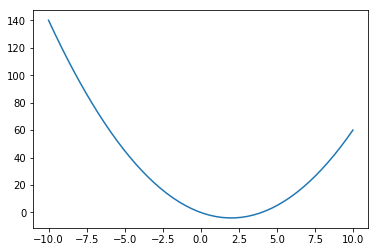

In [51]:
x = np.linspace(-10,10,num=50)
y = (x-2.0)**2.0-4.0
plt.plot(x,y)
plt.show()

Lo primero que se requiere es diseñar la función de evaluación. La función recibe un vector x, donde en cada elemento del vector están las variables x1, x2, x3, mejor dicho x=[ x1,x2,x3]. Para obtener el valor x1 del vector x, se escribe x(1), lo mismo se aplica para las otras variables. 

<hr>
### 3.1. Funcion de aptitud

In [55]:
def evalreal(x):
    return (x-2.0)**2.0-4.0

### 3.2. Inicializar parámetros del algoritmo genético

In [57]:
#GA parameters
ni = 1000 #number of iterations
nc = 100 #number of individuals
ng = 1 #number of genes == variable x

pc = 0.9
pm = 0.5
alpha = 0.5 #cross percentage for arithmetic cross

#search range
a = -10
b = 10

### 3.3. Inicializar población (p) y calcular la aptitud (fa) de sus individuos

In [59]:
#initial population
p = np.random.rand(nc,ng)
p = (b-a)*p + a 

#initial population evaluation using evalreal
fa = evalreal(p)

### 3.4. Ciclo principal del algoritmo genético:
Seleccion->Cruce->Mutación->Evaluación->Inserción

In [61]:
for i in range(ni):
    #selection: simple - random
    p1_index = np.random.randint(nc)
    p2_index = np.random.randint(nc)
    p1 = p[p1_index]
    p2 = p[p2_index]
    
    #cross
    if(np.random.rand() <= pc):
        child1 = alpha*p1+(1-alpha)*p2
        child2 = alpha*p2+(1-alpha)*p1
    
    #evaluation
    eval_child1 = evalreal(child1)
    eval_child2 = evalreal(child2)
    
    #insertion
    if(eval_child1 < fa[p1_index]):
        p[p1_index] = child1
        fa[p1_index] = eval_child1
    
    if(eval_child2 < fa[p2_index]):
        p[p2_index] = child2
        fa[p2_index] = eval_child2


### 3.5. Mostrar mejor individuo al final del ciclo

In [62]:
print 'El valor de x que minimiza la función es: ', p[np.argmin(fa)]
print 'Con una función de aptitud de: ', fa[np.argmin(fa)]

El valor de x que minimiza la función es:  [ 1.99999781]
Con una función de aptitud de:  [-4.]


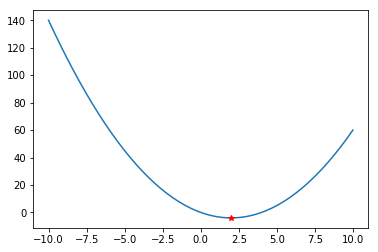

In [66]:
x = np.linspace(-10,10,num=50)
y = evalreal(x)

import matplotlib.pyplot as plt
plt.plot(x,y)
plt.plot(p[np.argmin(fa)], fa[np.argmin(fa)], 'r*')
plt.show()